In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# from PIL import Image

# import requests
# from transformers import AutoProcessor, Owlv2Model

In [3]:
import requests
from PIL import Image
import torch
from transformers import AutoProcessor, Owlv2ForObjectDetection

processor = AutoProcessor.from_pretrained("google/owlv2-base-patch16-ensemble")
model = Owlv2ForObjectDetection.from_pretrained("google/owlv2-base-patch16-ensemble")

url = "/home/vishal/Volume_E/Active/Gap_year/research/3d_manipulation/codes/intrinsic_image_decomposition/test_images/3.jpeg" # "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(url) # Image.open(requests.get(url, stream=True).raw)
# texts = [["pink blocks", "maroon blocks"]]
texts = [['blue blocks', 'red blocks']]
inputs = processor(text=texts, images=image, return_tensors="pt")

# forward pass
with torch.no_grad():
    outputs = model(**inputs)

target_sizes = torch.Tensor([image.size[::-1]])
# Convert outputs (bounding boxes and class logits) to final bounding boxes and scores
results = processor.post_process_object_detection(
    outputs=outputs, threshold=0.2, target_sizes=target_sizes
)

i = 0  # Retrieve predictions for the first image for the corresponding text queries
text = texts[i]
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

Detected blue blocks with confidence 0.367 at location [113.63, 159.09, 129.28, 176.34]
Detected red blocks with confidence 0.314 at location [176.14, 160.6, 194.09, 179.04]
Detected red blocks with confidence 0.349 at location [60.77, 168.81, 76.15, 186.3]
Detected blue blocks with confidence 0.383 at location [146.97, 169.0, 164.43, 188.19]
Detected blue blocks with confidence 0.327 at location [106.39, 182.99, 127.85, 206.86]
Detected red blocks with confidence 0.311 at location [74.76, 189.06, 92.14, 210.0]
Detected blue blocks with confidence 0.364 at location [31.18, 204.75, 49.92, 228.16]
Detected red blocks with confidence 0.336 at location [171.51, 213.61, 189.29, 236.14]
Detected blue blocks with confidence 0.368 at location [139.02, 233.48, 158.39, 255.56]


In [50]:
images = []
for i in range(4):
    for j in range(2):
        url = f"/home/vishal/Volume_E/Active/Gap_year/research/3d_manipulation/codes/intrinsic_image_decomposition/test_images/{i+1}.jpeg" # "http://images.cocodataset.org/val2017/000000039769.jpg"
        image = Image.open(url) # Image.open(requests.get(url, stream=True).raw)
        if i==0:
            texts = [["pink blocks", "maroon blocks"]][0][j]
        if i==1:
            texts = [["olive blocks", "grey blocks"]][0][j]
        if i==2:
            texts = [["red blocks", "blue blocks"]][0][j]
        if i==3:
            texts = [["white blocks", "black blocks"]][0][j]
        inputs = processor(text=texts, images=image, return_tensors="pt")

        # forward pass
        with torch.no_grad():
            outputs = model(**inputs)

        target_sizes = torch.Tensor([image.size[::-1]])
        # Convert outputs (bounding boxes and class logits) to final bounding boxes and scores
        results = processor.post_process_object_detection(
            outputs=outputs, threshold=0.2, target_sizes=target_sizes
        )

        k = 0  # Retrieve predictions for the first image for the corresponding text queries
        text = texts[k]
        boxes, scores, labels = results[k]["boxes"], results[k]["scores"], results[k]["labels"]

        for box, score, label in zip(boxes, scores, labels):
            box = [round(k, 2) for k in box.tolist()]
            # print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

        from PIL import ImageDraw

        # Draw bounding boxes on the image
        draw = ImageDraw.Draw(image)
        for box, score, label in zip(boxes, scores, labels):
            box = [round(k, 2) for k in box.tolist()]
            draw.rectangle(box, outline="red", width=2)
            draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 3)}", fill="red")
        # plt.figure(i)
        # plt.imshow(np.array(image))
        images.append(image)

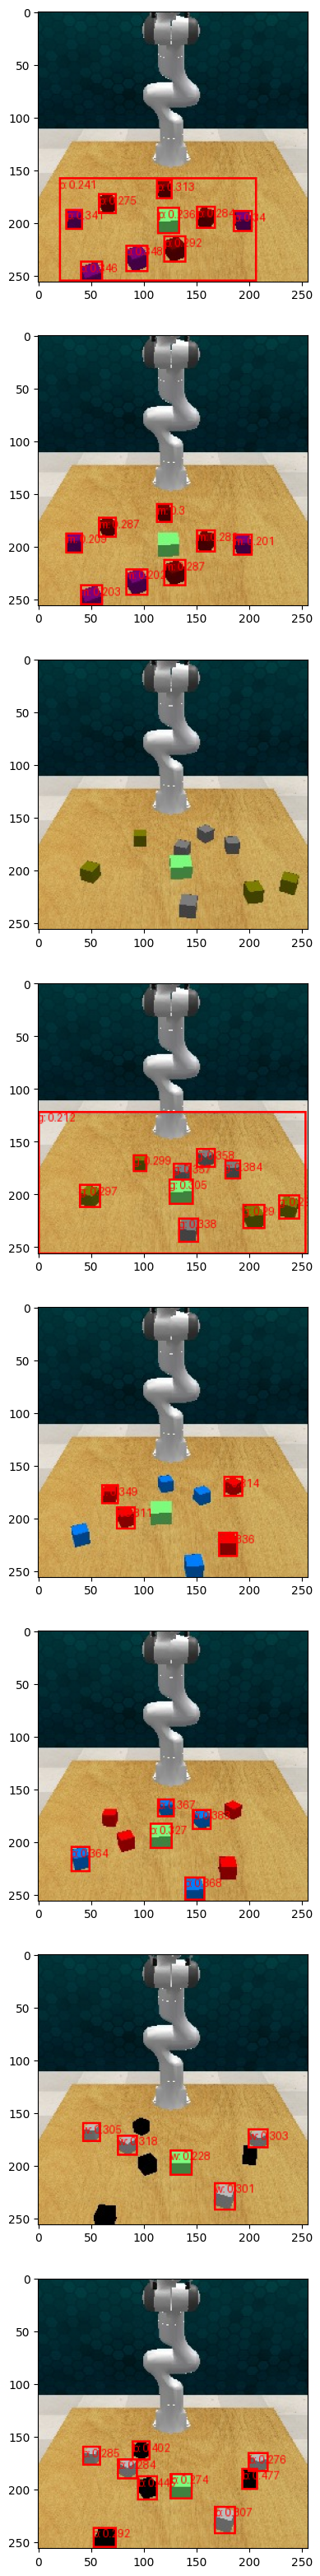

In [51]:
from PIL import Image
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(8, 1,  figsize=(10, 40))

# Plot each image in its respective subplot using nested loops
for i in range(8):
    axes[i].imshow(images[i])
    plt.imsave(f'./results/owlv2_outs/{i}.png', images[i])

In [28]:
images = []
for i in range(4):
    url = f"/home/vishal/Volume_E/Active/Gap_year/research/3d_manipulation/codes/intrinsic_image_decomposition/test_images/{i+1}.jpeg" # "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(url) # Image.open(requests.get(url, stream=True).raw)
    if i==0:
        texts = [["pink blocks", "maroon blocks"]]
    if i==1:
        texts = [["olive blocks", "grey blocks"]]
    if i==2:
        texts = [["red blocks", "blue blocks"]]
    if i==3:
        texts = [["white blocks", "black blocks"]]
    inputs = processor(text=texts, images=image, return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.Tensor([image.size[::-1]])
    # Convert outputs (bounding boxes and class logits) to final bounding boxes and scores
    results = processor.post_process_object_detection(
        outputs=outputs, threshold=0.2, target_sizes=target_sizes
    )

    i = 0  # Retrieve predictions for the first image for the corresponding text queries
    text = texts[i]
    boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        # print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

    from PIL import ImageDraw

    # Draw bounding boxes on the image
    draw = ImageDraw.Draw(image)
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 3)}", fill="red")
    # plt.figure(i)
    # plt.imshow(np.array(image))
    images.append(image)

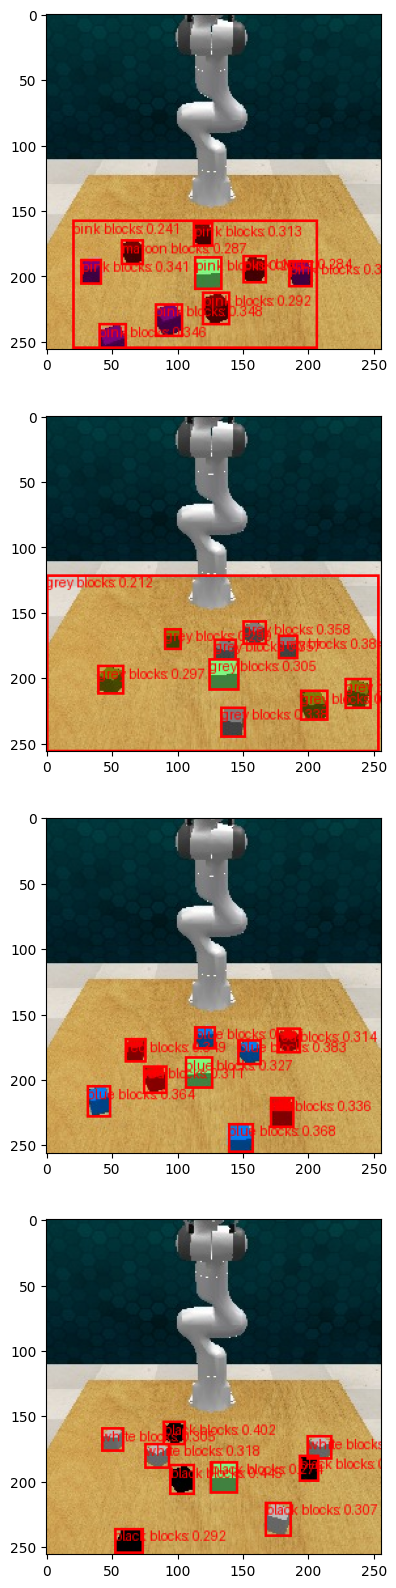

In [29]:
from PIL import Image
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 1,  figsize=(10, 20))

# Plot each image in its respective subplot using nested loops
for i in range(4):
    axes[i].imshow(images[i])
    plt.imsave(f'./results/owlv2_outs/{i}.png', images[i])
    

In [30]:
images = []
for i in range(4):
    url = f"/home/vishal/Volume_E/Active/Gap_year/research/3d_manipulation/codes/intrinsic_image_decomposition/test_images/{i+1}.jpeg" # "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(url) # Image.open(requests.get(url, stream=True).raw)
    if i==0:
        texts = [["pink cubes", "maroon cubes"]]
    if i==1:
        texts = [["olive cubes", "grey cubes"]]
    if i==2:
        texts = [["red cubes", "blue cubes"]]
    if i==3:
        texts = [["white cubes", "black cubes"]]
    inputs = processor(text=texts, images=image, return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.Tensor([image.size[::-1]])
    # Convert outputs (bounding boxes and class logits) to final bounding boxes and scores
    results = processor.post_process_object_detection(
        outputs=outputs, threshold=0.2, target_sizes=target_sizes
    )

    i = 0  # Retrieve predictions for the first image for the corresponding text queries
    text = texts[i]
    boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        # print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

    from PIL import ImageDraw

    # Draw bounding boxes on the image
    draw = ImageDraw.Draw(image)
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 3)}", fill="red")
    # plt.figure(i)
    # plt.imshow(np.array(image))
    images.append(image)

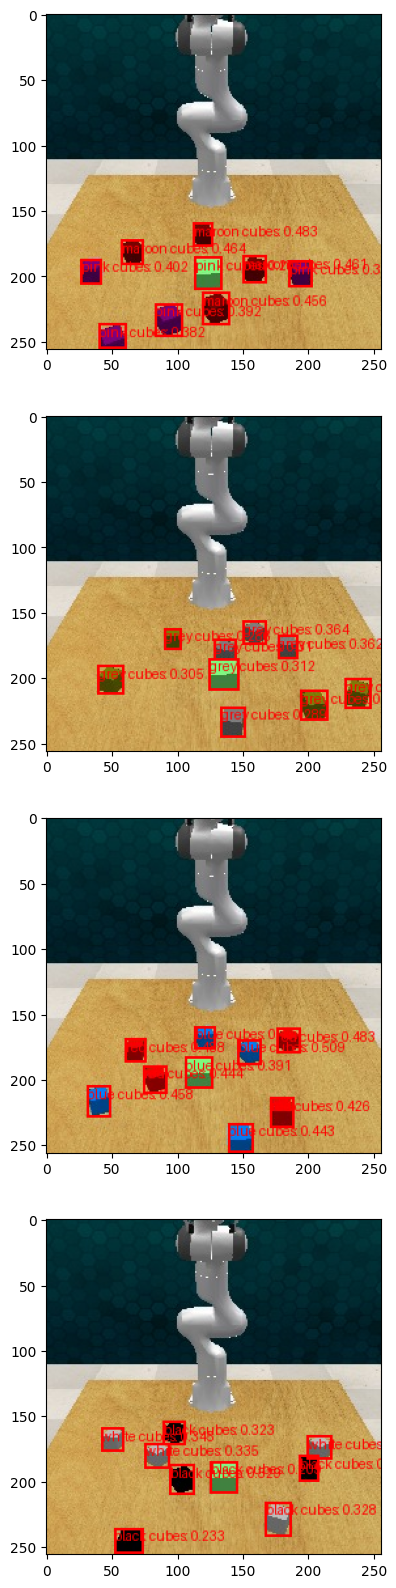

In [31]:
from PIL import Image
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 1,  figsize=(10, 20))

# Plot each image in its respective subplot using nested loops
for i in range(4):
    axes[i].imshow(images[i])
    plt.imsave(f'./results/owlv2_outs/{i}.png', images[i])
    

In [34]:
images = []
for i in range(4):
    url = f"/home/vishal/Volume_E/Active/Gap_year/research/3d_manipulation/codes/intrinsic_image_decomposition/test_images/{i+1}.jpeg" # "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(url) # Image.open(requests.get(url, stream=True).raw)
    if i==0:
        texts = [["pink objects", "maroon objects"]]
    if i==1:
        texts = [["olive objects", "grey objects"]]
    if i==2:
        texts = [["red objects", "blue objects"]]
    if i==3:
        texts = [["white objects", "black objects"]]
    inputs = processor(text=texts, images=image, return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.Tensor([image.size[::-1]])
    # Convert outputs (bounding boxes and class logits) to final bounding boxes and scores
    results = processor.post_process_object_detection(
        outputs=outputs, threshold=0.2, target_sizes=target_sizes
    )

    i = 0  # Retrieve predictions for the first image for the corresponding text queries
    text = texts[i]
    boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        # print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

    from PIL import ImageDraw

    # Draw bounding boxes on the image
    draw = ImageDraw.Draw(image)
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 3)}", fill="red")
    # plt.figure(i)
    # plt.imshow(np.array(image))
    images.append(image)

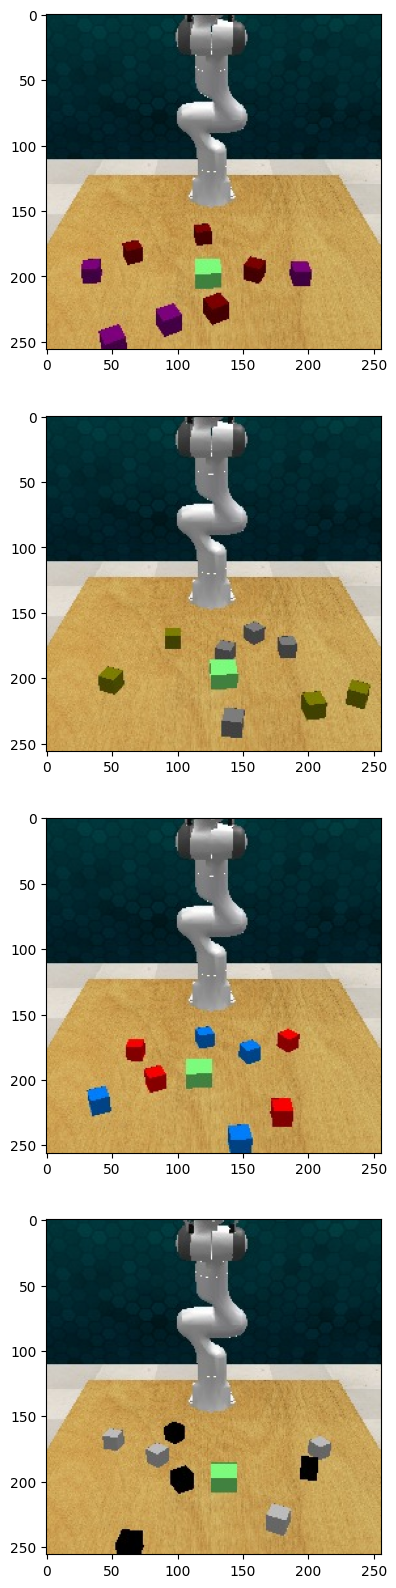

In [35]:
from PIL import Image
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 1,  figsize=(10, 20))

# Plot each image in its respective subplot using nested loops
for i in range(4):
    axes[i].imshow(images[i])
    plt.imsave(f'./results/owlv2_outs/{i}.png', images[i])
    

# Object Detection tests on Albedos

In [38]:
images = []
for i in range(4):
    url = f"/home/vishal/Volume_E/Active/Gap_year/research/3d_manipulation/codes/intrinsic_image_decomposition/results/intrinsic_outs/albedo_{i+1}.png" # "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(url) # Image.open(requests.get(url, stream=True).raw)
    if i==0:
        texts = [["pink blocks", "maroon blocks"]]
    if i==1:
        texts = [["olive blocks", "grey blocks"]]
    if i==2:
        texts = [["red blocks", "blue blocks"]]
    if i==3:
        texts = [["white blocks", "black blocks"]]
    inputs = processor(text=texts, images=image, return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.Tensor([image.size[::-1]])
    # Convert outputs (bounding boxes and class logits) to final bounding boxes and scores
    results = processor.post_process_object_detection(
        outputs=outputs, threshold=0.2, target_sizes=target_sizes
    )

    i = 0  # Retrieve predictions for the first image for the corresponding text queries
    text = texts[i]
    boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        # print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

    from PIL import ImageDraw

    # Draw bounding boxes on the image
    draw = ImageDraw.Draw(image)
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 3)}", fill="red")
    # plt.figure(i)
    # plt.imshow(np.array(image))
    images.append(image)

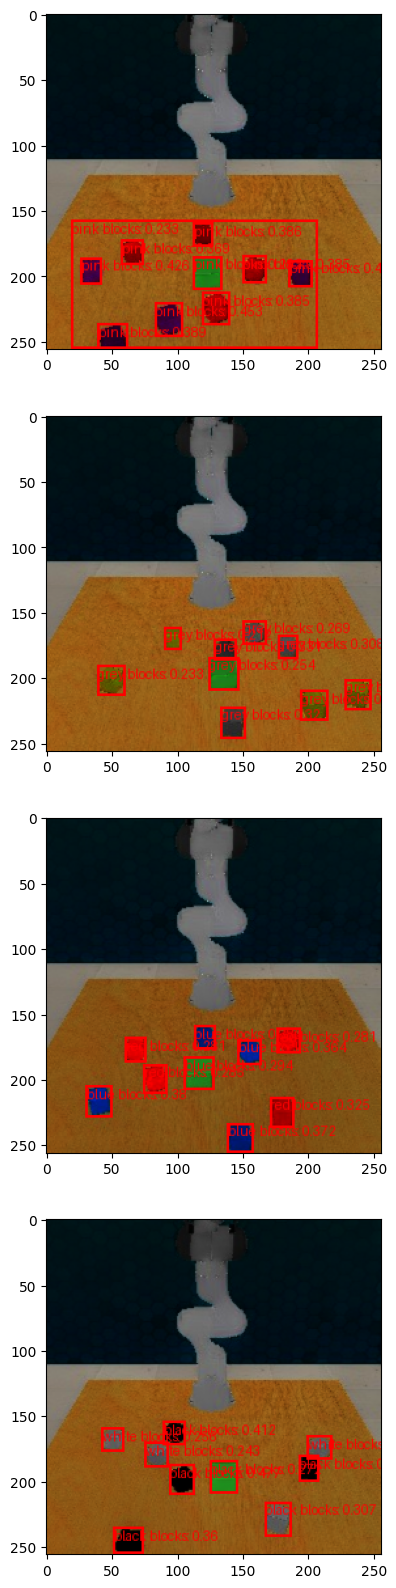

In [39]:
from PIL import Image
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 1,  figsize=(10, 20))

# Plot each image in its respective subplot using nested loops
for i in range(4):
    axes[i].imshow(images[i])
    # plt.imsave(f'./results/owlv2_outs/{i}.png', images[i])

In [40]:
images = []
for i in range(4):
    url = f"/home/vishal/Volume_E/Active/Gap_year/research/3d_manipulation/codes/intrinsic_image_decomposition/results/intrinsic_outs/albedo_{i+1}.png" # "http://images.cocodataset.org/val2017/000000039769.jpg"
    image = Image.open(url) # Image.open(requests.get(url, stream=True).raw)
    if i==0:
        texts = [["pink cubes", "maroon cubes"]]
    if i==1:
        texts = [["olive cubes", "grey cubes"]]
    if i==2:
        texts = [["red cubes", "blue cubes"]]
    if i==3:
        texts = [["white cubes", "black cubes"]]
    inputs = processor(text=texts, images=image, return_tensors="pt")

    # forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    target_sizes = torch.Tensor([image.size[::-1]])
    # Convert outputs (bounding boxes and class logits) to final bounding boxes and scores
    results = processor.post_process_object_detection(
        outputs=outputs, threshold=0.2, target_sizes=target_sizes
    )

    i = 0  # Retrieve predictions for the first image for the corresponding text queries
    text = texts[i]
    boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        # print(f"Detected {text[label]} with confidence {round(score.item(), 3)} at location {box}")

    from PIL import ImageDraw

    # Draw bounding boxes on the image
    draw = ImageDraw.Draw(image)
    for box, score, label in zip(boxes, scores, labels):
        box = [round(i, 2) for i in box.tolist()]
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 3)}", fill="red")
    # plt.figure(i)
    # plt.imshow(np.array(image))
    images.append(image)

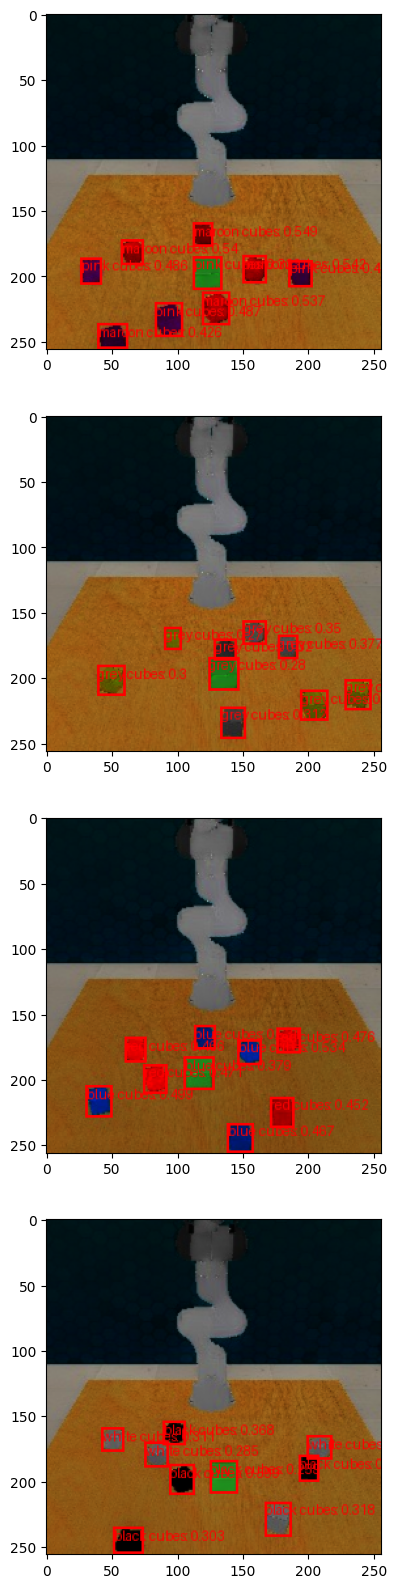

In [41]:
from PIL import Image
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 1,  figsize=(10, 20))

# Plot each image in its respective subplot using nested loops
for i in range(4):
    axes[i].imshow(images[i])
    # plt.imsave(f'./results/owlv2_outs/{i}.png', images[i])

In [4]:
results[i].keys()

dict_keys(['scores', 'labels', 'boxes'])

In [6]:
from PIL import ImageDraw
import numpy as np

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline="red", width=2)
    draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 3)}", fill="red")

# # Save or show the image with bounding boxes
# image.show()  # To display the image

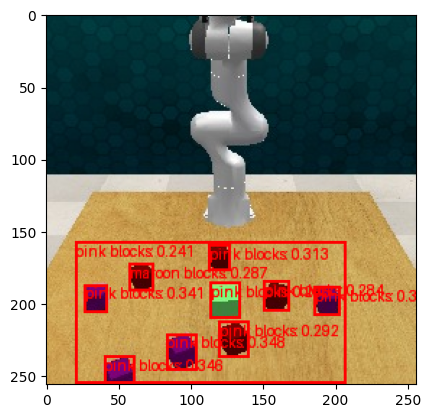

In [14]:
# import numpy as np
plt.imshow(np.array(image)) #save('obj_detect_res1.png')